### Implement a KNN model to classify the animals in to category.

## KNN

k-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for classification and regression tasks. It's a simple yet effective algorithm that can be used for both types of problems.

**Classification with KNN:**
1. **Training**: In the training phase, KNN stores all available data points and their corresponding class labels.

2. **Prediction**: To predict the class of a new data point, KNN calculates the distances between that point and all other data points in the training dataset. Common distance metrics include Euclidean distance, Manhattan distance, or other distance measures.

3. **Neighbor Selection**: KNN then selects the K-nearest data points (i.e., the K data points with the smallest distances) to the new data point. K is a hyperparameter that you need to specify beforehand.

4. **Majority Vote**: For classification, KNN counts the class labels of the K-nearest neighbors and assigns the class label that occurs most frequently as the predicted class for the new data point. This is often referred to as a "majority vote."

**Regression with KNN:**
In regression tasks, instead of predicting a class label, KNN predicts a numerical value. The process is similar to classification, except that instead of taking a majority vote, KNN calculates the average (or weighted average) of the target values of the K-nearest neighbors and assigns that as the predicted value.

Key characteristics and considerations of KNN:

- K is a crucial hyperparameter that you must choose before training the model. The optimal value of K can vary depending on the dataset and the problem at hand.

- KNN is a lazy learner, meaning it doesn't build an explicit model during training. It stores the entire training dataset and performs computations during prediction, which can make it computationally expensive for large datasets.

- KNN can be sensitive to the choice of distance metric. Choosing the appropriate distance metric depends on the nature of the data and the problem.

- It is a non-parametric algorithm, which means it doesn't make assumptions about the underlying data distribution.

- KNN can be prone to the "curse of dimensionality," where its performance degrades as the number of features (dimensions) in the dataset increases. Dimensionality reduction techniques may be needed in high-dimensional spaces.

KNN is often used as a baseline model for classification tasks, and it can perform well when the dataset is not too large and the feature space is not too high-dimensional. However, it's essential to consider the choice of K and the appropriate preprocessing of data when using KNN.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
Zoo_data=pd.read_csv(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\13.KNN\Zoo.csv')
Zoo_data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


#### Data Understanding

In [4]:
Zoo_data.shape

(101, 18)

In [5]:
Zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
Zoo_data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
Zoo_data.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [8]:
Zoo_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [9]:
Zoo_data["legs"].unique()

array([4, 0, 2, 6, 8, 5], dtype=int64)

+ All feature values are given as binary values (1- present / 0-absent) except for the legs where it is given as a count of legs.
+ We want to treat the legs columns differently as it does not present data the same way as the remaining columns.

### Exploratary Data Analysis

**Cor-relation**

<AxesSubplot:>

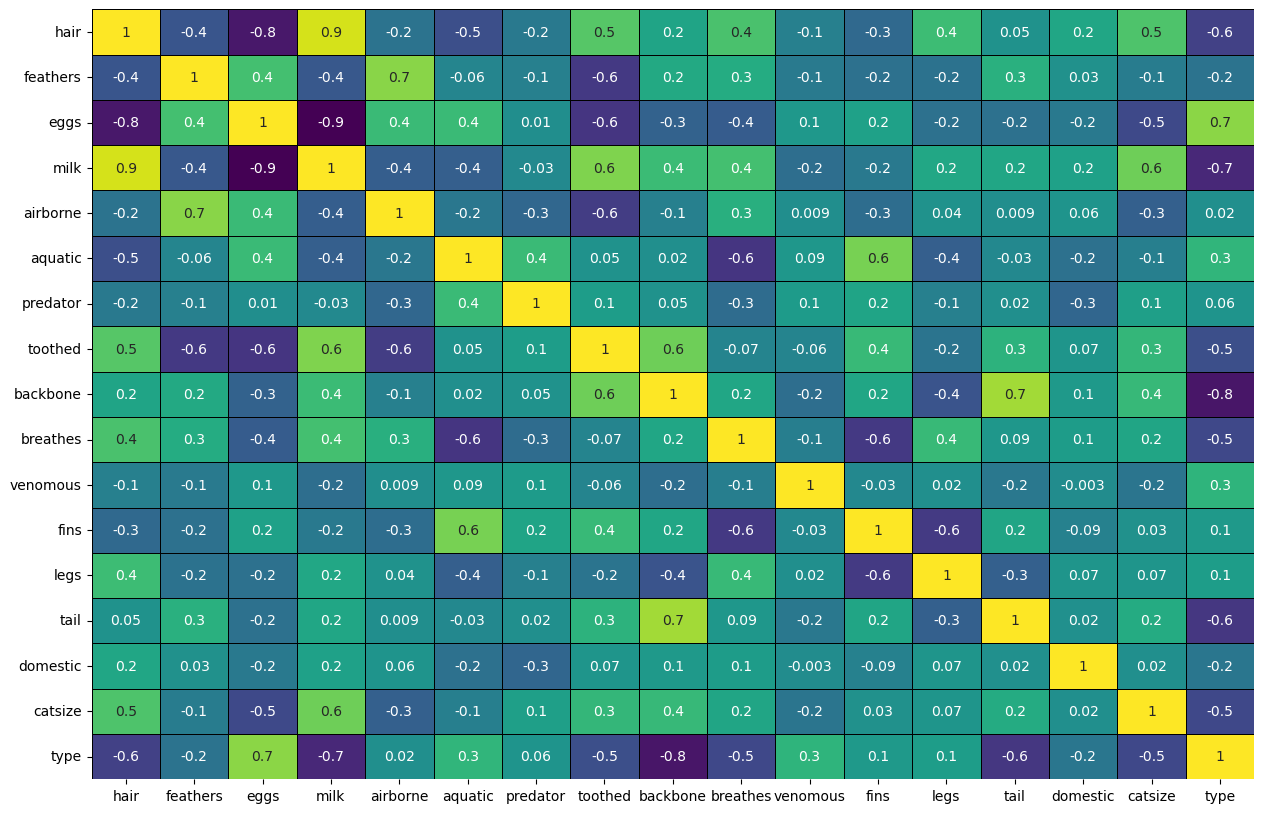

In [10]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(Zoo_data.corr(),annot=True,fmt='.1g',cmap="viridis",cbar=False,linewidths=0.5,linecolor='black')

In [11]:
Zoo_Legs=Zoo_data.copy()
Zoo_Legs['has_legs']=np.where(Zoo_Legs['legs']>0,1,0)
Zoo_Legs=Zoo_Legs[['animal name','hair','feathers','eggs','milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes','venomous','fins','legs','has_legs','tail', 'domestic','catsize','type']]
Zoo_Legs.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1,1


This line creates a new column called 'has_legs' in the Zoo_Legs DataFrame. It uses the np.where() function from the NumPy library to assign values to this new column based on a condition. The condition is Zoo_Legs['legs'] > 0, which checks if the number of legs for each animal (in the 'legs' column) is greater than zero. If this condition is true for an animal, it assigns the value 1 to the 'has_legs' column; otherwise, it assigns 0.

In [12]:
Zoo_Legs[['type','has_legs']].corr()

,type,has_legs
type,1.000000,-0.303221
has_legs,-0.303221,1.000000


**Data Visualization**

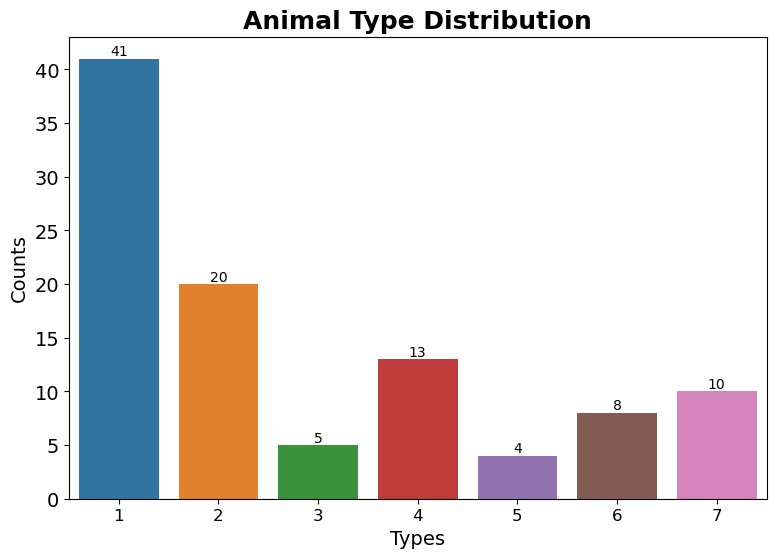

In [13]:
plt.figure(figsize=(9,6))
ax=sns.barplot(x=Zoo_data['type'].value_counts().index.tolist(),y=Zoo_data['type'].value_counts().tolist())
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.title("Animal Type Distribution", fontsize=18,fontweight='bold')
plt.xlabel('Types',fontsize=14)
plt.ylabel('Counts',fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)

+ Most of the animals belongs to Type 1

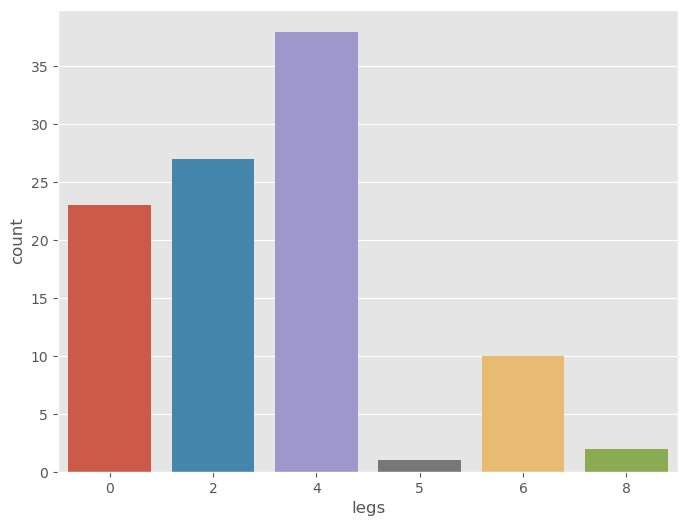

In [14]:
plt.style.use("ggplot")
fig,ax=plt.subplots(figsize=(8,6))
sns.countplot(Zoo_data["legs"]);

+ Most of the animals have four legs

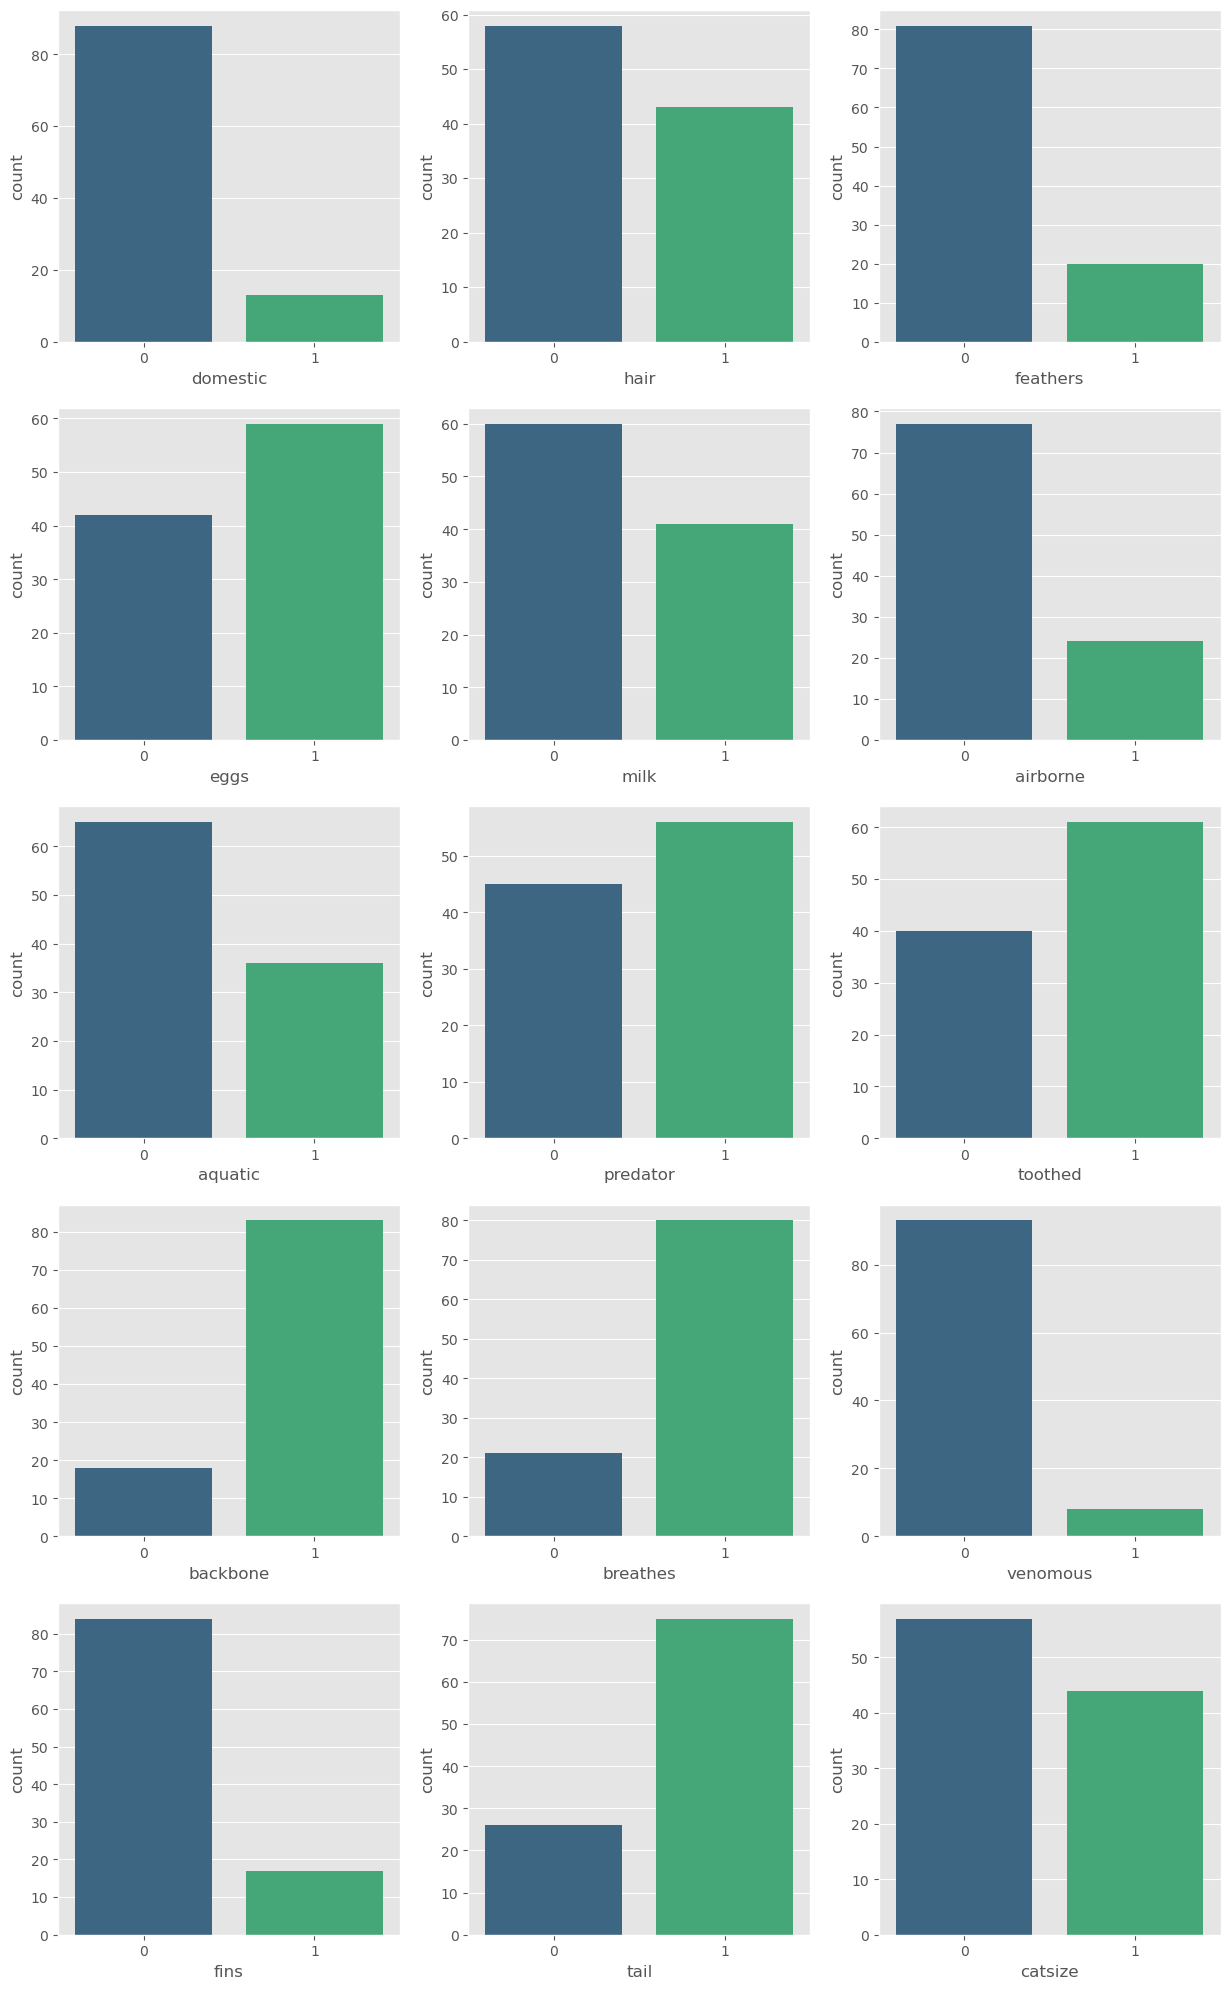

In [15]:
plt.style.use("ggplot")
fig,ax=plt.subplots(5,3,figsize=(15,25)) 

sns.countplot(Zoo_data["domestic"],palette="viridis",ax=ax[0,0])
sns.countplot(Zoo_data["hair"],palette="viridis",ax=ax[0,1])
sns.countplot(Zoo_data["feathers"],palette="viridis",ax=ax[0,2])

sns.countplot(Zoo_data["eggs"],palette="viridis",ax=ax[1,0])
sns.countplot(Zoo_data["milk"],palette="viridis",ax=ax[1,1])
sns.countplot(Zoo_data["airborne"],palette="viridis",ax=ax[1,2])

sns.countplot(Zoo_data["aquatic"],palette="viridis",ax=ax[2,0])
sns.countplot(Zoo_data["predator"],palette="viridis",ax=ax[2,1])
sns.countplot(Zoo_data["toothed"],palette="viridis",ax=ax[2,2])

sns.countplot(Zoo_data["backbone"],palette="viridis",ax=ax[3,0])
sns.countplot(Zoo_data["breathes"],palette="viridis",ax=ax[3,1])
sns.countplot(Zoo_data["venomous"],palette="viridis",ax=ax[3,2])

sns.countplot(Zoo_data["fins"],palette="viridis",ax=ax[4,0])
sns.countplot(Zoo_data["tail"],palette="viridis",ax=ax[4,1])
sns.countplot(Zoo_data["catsize"],palette="viridis",ax=ax[4,2]);

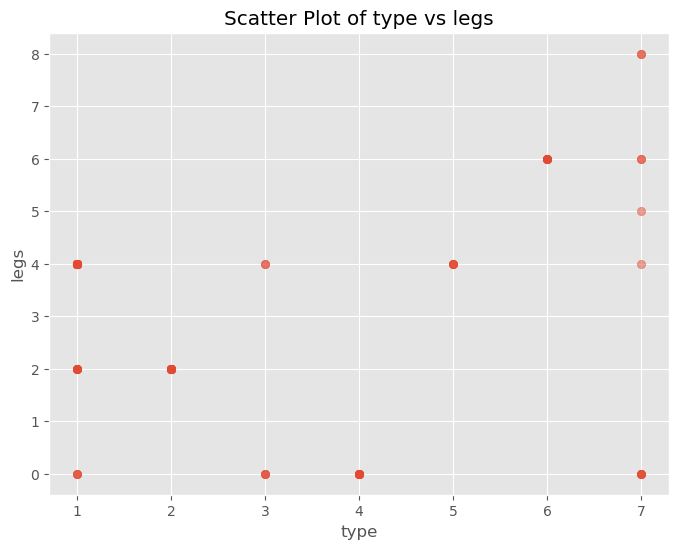

In [16]:
plt.figure(figsize=(8,6)) 
plt.scatter(Zoo_data['type'],Zoo_data['legs'],alpha=0.5)
plt.title('Scatter Plot of type vs legs')
plt.xlabel('type')  
plt.ylabel('legs')  
plt.grid(True) 
plt.show() 

### Data Pre-processing

**Droping Unwanted Column**

In [17]:
Zoo_data=Zoo_data.drop(["animal name"],axis= 1)
Zoo_data.head(2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [18]:
Zoo=Zoo_data.copy()

**Scaling**

**Distance-Based Algorithms**: Algorithms that rely on distances between data points, such as K-Nearest Neighbors (KNN) and Support Vector Machines (SVM), are sensitive to feature scales. Scaling is essential to ensure that features contribute equally to the distance calculations.

In [19]:
from sklearn.preprocessing import StandardScaler


# Extract the column you want to scale as a 2D array (required format for StandardScaler)
column_data=Zoo_data['legs'].values.reshape(-1,1)

# Initialize the StandardScaler
scaler=StandardScaler()

# Fit the scaler on the column data and transform it
scaled_column=scaler.fit_transform(column_data)

# Replace the original column with the scaled values
Zoo_data['legs']=scaled_column

**Spliting Data**

In [20]:
X=Zoo_data.drop('type',axis=1)
y=Zoo_data[['type']]

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score,train_test_split

### Training & Testing With Scaled Data

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=13)

In [23]:
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (80, 16)
Shape of X_test: (21, 16)
Shape of y_train: (80, 1)
Shape of y_test: (21, 1)


In [25]:
# Get score for different values of n
k_list=np.arange(1, 40, 2)
mean_scores=[]
accuracy_list=[]
error_rate=[]

for i in k_list:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    pred_i=pred_i.reshape(2n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors1,1)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

In [26]:
n_neighbors=np.array([2*i+1 for i in range(1,20)])
param_grid=dict(n_neighbors=n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [27]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv =10)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [28]:
print(grid.best_score_)
print(grid.best_params_)

0.95
{'n_neighbors': 3}


**Visualizing the CV results**

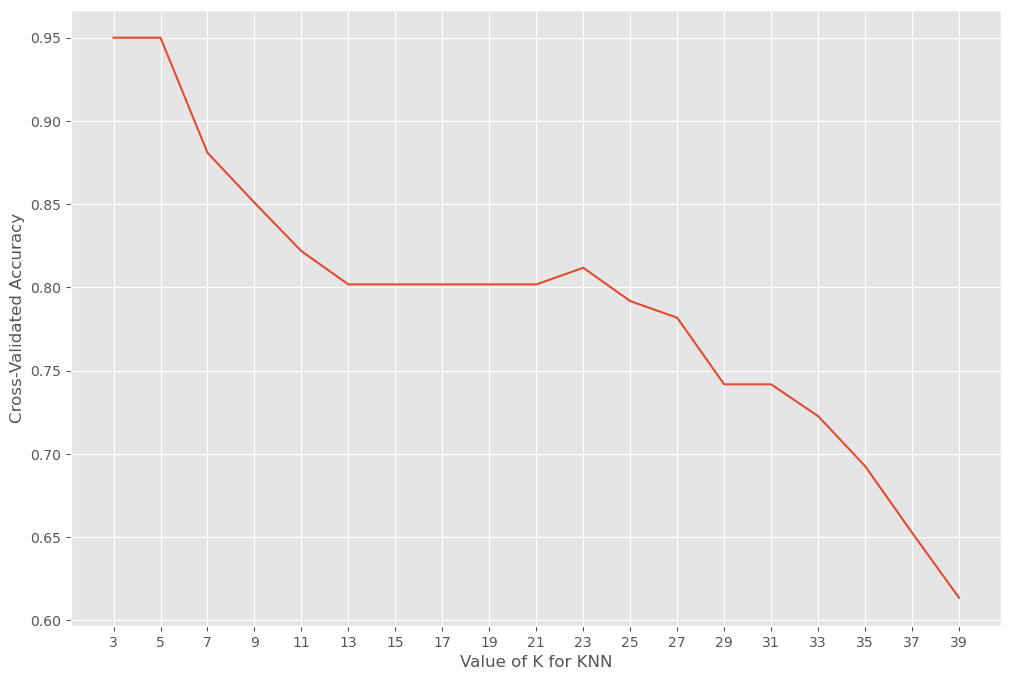

In [29]:
# choose k between 1 to 40
k_range=np.array([2*i+1 for i in range(1,20)])
k_scores=[]
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X,y,cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(12,8))
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

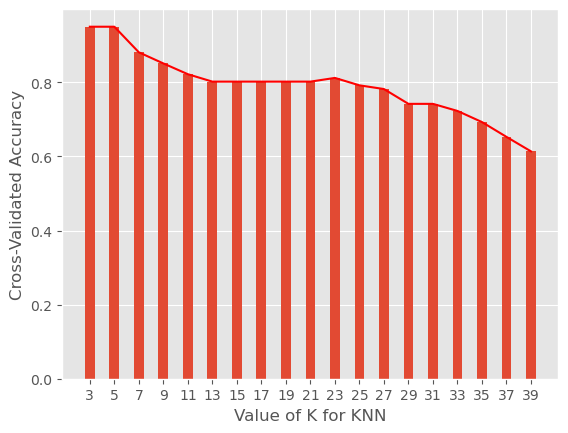

<Figure size 1200x800 with 0 Axes>

In [30]:
# choose k between 1 to 20
k_range=[2*i+1 for i in range(1,20)]
k_scores=[]
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range,k_scores)
plt.plot(k_range,k_scores,color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.figure(figsize=(12,8))
plt.show()

Text(0, 0.5, 'Error Rate')

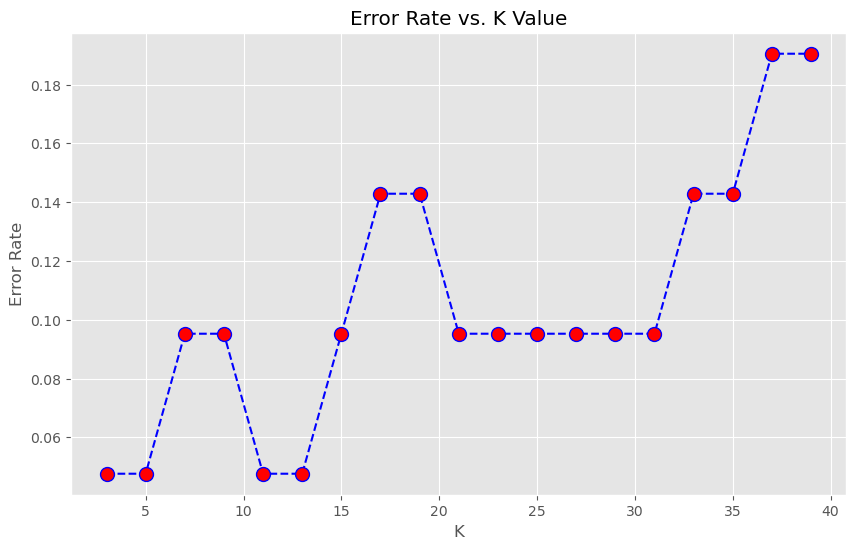

In [31]:
error_rate=[]

# Will take some time
k_range=[i for i in range(3,40,2)]
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    pred_i=pred_i.reshape(21,1)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot([i for i in range(3,40,2)],error_rate,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

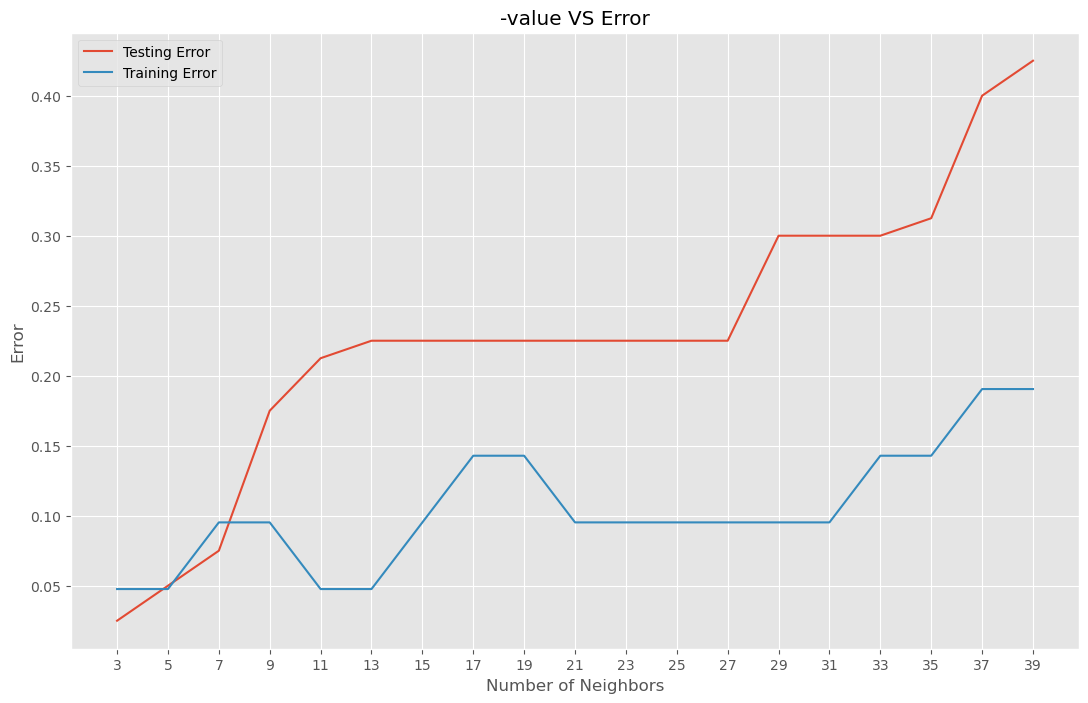

In [32]:
error1=[]
error2=[]
k_range=[i for i in range(3,40,2)]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1=knn.predict(X_train)
    y_pred1=y_pred1.reshape(80,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2=knn.predict(X_test)
    y_pred2=y_pred2.reshape(21,1)
    error2.append(np.mean(y_test!= y_pred2))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range,error1,label='Testing Error')
plt.plot(k_range,error2,label='Training Error')
plt.legend()
plt.title('-value VS Error')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.xticks(k_range)
plt.show()

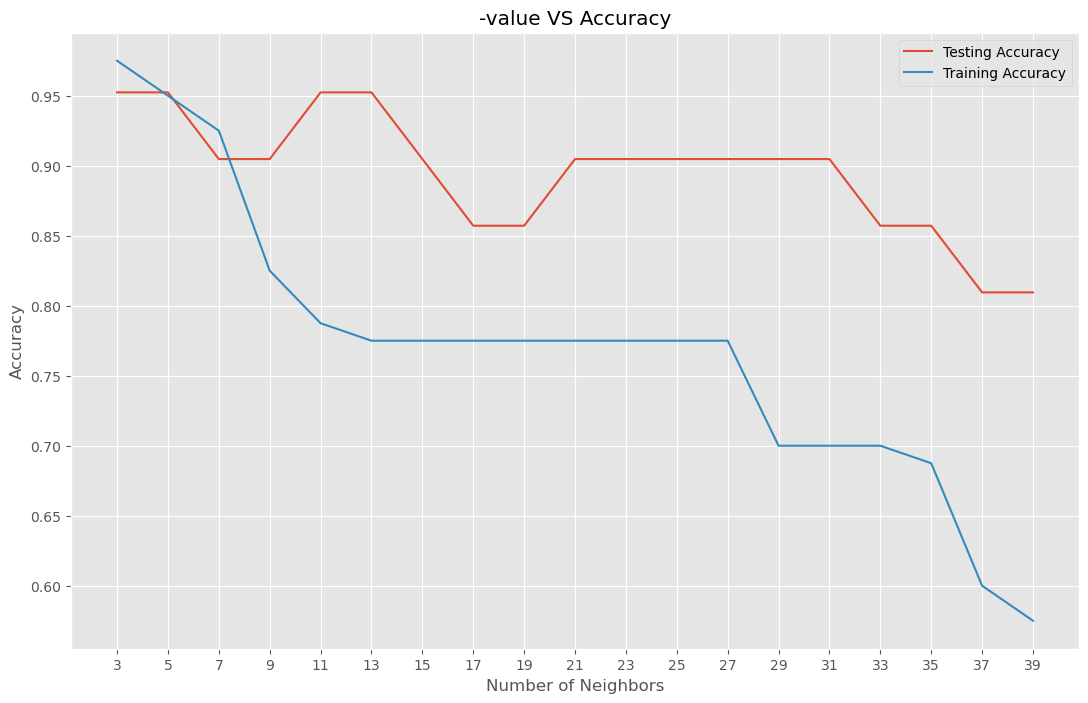

In [33]:
train_accuracy=[]
test_accuracy=[]

k_range=[i for i in range(3,40,2)]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test,y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range,test_accuracy,label='Testing Accuracy')
plt.plot(k_range,train_accuracy,label='Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.savefig('graph.png')
plt.show()

**Applying KNN with k=3**

In [34]:
# NOW WITH K=3
knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred=knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[10  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  1]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.81      0.83      0.82        21
weighted avg       0.91      0.95      0.93        21



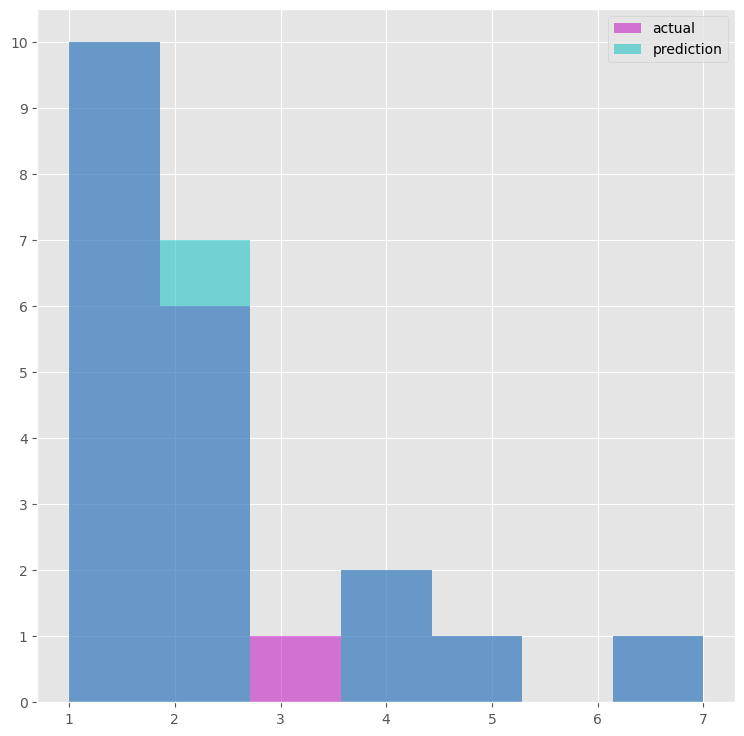

In [35]:
plt.rcParams['figure.figsize']=(9,9) 
_, ax=plt.subplots()
ax.hist(y_test,color='m',alpha=0.5,label='actual',bins=7)
ax.hist(pred,color='c',alpha=0.5,label='prediction',bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc='best')
plt.show()

**Applying KNN with k=11**

In [37]:
# NOW WITH K=5
knn=KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train,y_train)
pred=knn.predict(X_test)

print('WITH K=11')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=11


[[10  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  1]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.81      0.83      0.82        21
weighted avg       0.91      0.95      0.93        21



## Splitting, Training & Testing with Unscaled Data

In [38]:
Zoo.head(2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [39]:
X=Zoo.drop('type',axis=1)
y=Zoo[['type']]

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [41]:
print("Shape of X_train :",X_train.shape)
print("Shape of X_test  :",X_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test  :",y_test.shape)

Shape of X_train : (80, 16)
Shape of X_test  : (21, 16)
Shape of y_train : (80, 1)
Shape of y_test  : (21, 1)


**k=3**

In [42]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.8095


**k=5**

In [44]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.7619


**k=7**

In [43]:
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.7143


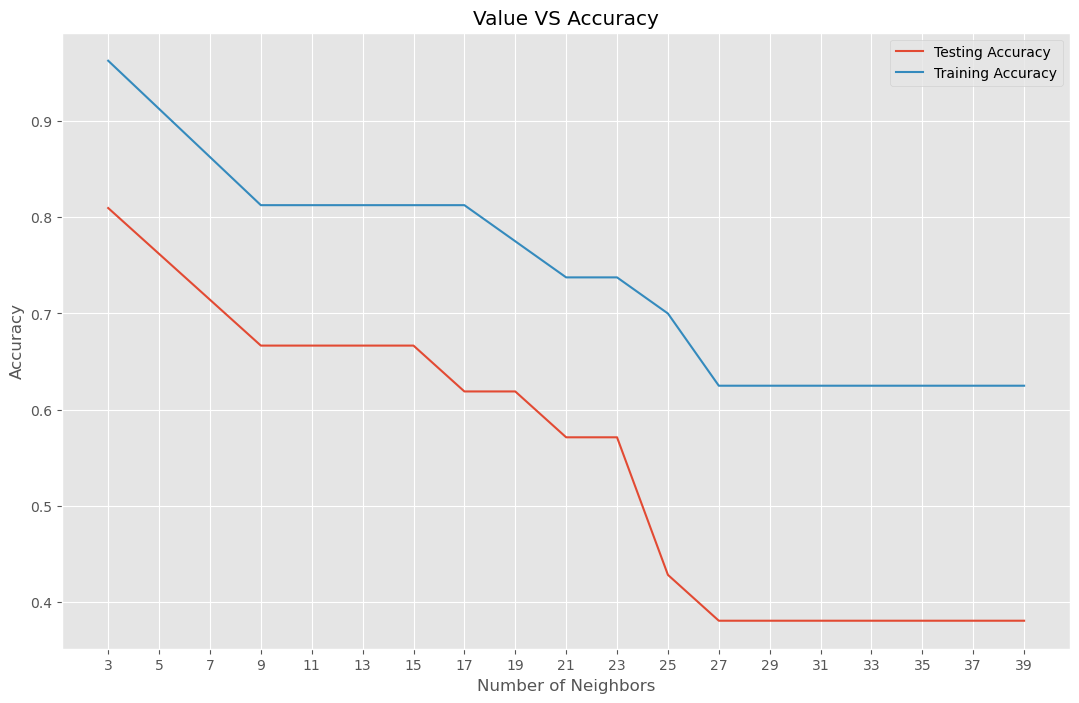

In [45]:
train_accuracy=[]
test_accuracy=[]

k_range=[i for i in range(3,40,2)]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test,y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.savefig('graph.png')
plt.show()